In [50]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pycbc.waveform as waveform
import numpy as np

In [4]:
class CnnTs(nn.Module):

    def __init__(self):
        super(Cnn1d, self).__init__()
        # [1,1,1000]
        self.conv_1 = nn.Conv1d(in_channels=1, out_channels=6,
                                kernel_size=3, padding=1)
        # [1,6,1000]
        self.maxpool = nn.MaxPool1d(kernel_size=2)
        # [1,6,500]
        self.conv_2 = nn.Conv1d(in_channels=6, out_channels=16,
                                kernel_size=3, padding=1)
        # [1,16,500]
        # After pooling : [1,16,250]
        self.full_connect_1 = nn.Linear(16*250, 500)
        self.full_connect_2 = nn.Linear(500, 100)
        self.full_connect_3 = nn.Linear(100, 1)

    def forward(self, input):
        input = self.maxpool(F.relu(self.conv_1(input)))
        input = self.maxpool(F.relu(self.conv_2(input)))
        input = input.view(1, 16*250)
        input = F.relu(self.full_connect_1(input))
        input = F.relu(self.full_connect_2(input))
        input = F.relu(self.full_connect_3(input))
        return input

In [ ]:
# Network instance
model = CnnTs()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Hyperparameters
learning_rate = 1e-3

# Loss function : MSE // Optimizer : Adam
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

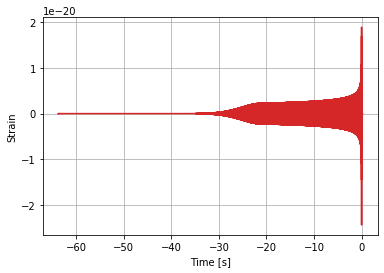

In [54]:
sz_sample = 10
m1_interval = np.linspace(1.4, 1.7, sz_sample)
h_plus, h_cross, sample_times = [], [], []
for i in range(sz_sample):
    hp, hc = waveform.get_td_waveform(approximant="IMRPhenomPv2_NRTidal",
                                      mass1=m1_interval[i], mass2=1.5,
                                      delta_t=1.0/4096, f_lower=40)
    h_plus.append(hp)
    h_cross.append(hc)
    sample_times.append(hp.sample_times)

fig, ax = plt.subplots()
ax.plot(sample_times[6], h_plus[6], c="tab:red")
ax.set(xlabel="Time [s]", ylabel="Strain", title="Waveform model")
ax.grid()

In [ ]:
epochs = 100
for i in range(epochs):
    

In [55]:
type(h_plus[0])

pycbc.types.timeseries.TimeSeries

In [56]:
h_plus[0]